In [1]:
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
path_plot_dir = Path('../plots')

In [3]:


## run one experiment dict

## day:[temp, chamber],
## 12->14.5
run1 = { 
    0:[12,'start->table+food'],
    1:[12,'table'],
    2:[12,'table'],
    3:[12,'table->box'],
    4:[12,'box->flips->table'],
    5:[12,'table'],
    6:[12,'table'],
    7:[12,'table+clean+food'],
    8:[13.2,'table'],
    9:[14.5,'table'],
    10:[14.5,'table->box'],
    11:[14.5,'box->flips->table'],
    12:[13.2,'table'],
    13:[12,'table'],
    14:[12,'end'],
}
## 12->12
run2 = {
    0:[12,'start->table+food'],
    1:[12,'table'],
    2:[12,'table'],
    3:[12,'table->box'],
    4:[12,'box->flips->table'],
    5:[12,'table'],
    6:[12,'table'],
    7:[12,'table+clean+food'],
    8:[12,'table'],
    9:[12,'table'],
    10:[12,'table->box'],
    11:[12,'box->flips->table'],
    12:[12,'table'],
    13:[12,'end'],
}
## 12->17
run3 = {
    0:[12,'start->table+food'],
    1:[12,'table'],
    2:[12,'table'],
    3:[12,'table->box'],
    4:[12,'box->flips->table'],
    5:[12,'table'],
    6:[13.2,'table'],
    7:[14.5,'table+clean+food'],
    8:[15.7,'table'],
    9:[17,'table'],
    10:[17,'table->box'],
    11:[17,'box->flips->table'],
    12:[15.7,'table'],
    13:[14.5,'table'],
    14:[13.2,'table'],
    15:[12,'table'],
    16:[12,'end'],
}

[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


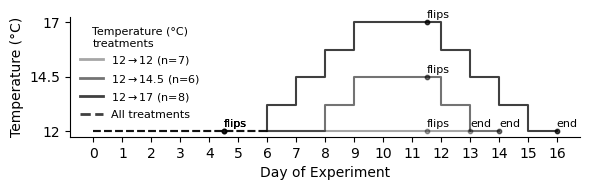

In [13]:
color_run1 = 'black'
color_run2 = 'black'
color_run3 = 'black'

run1_alpha = .55
run2_alpha = .35
run3_alpha = .75

yticks = [12,14.5,17]
xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

fig, ax = plt.subplots(1,1,figsize=(6,2))


def plotRun (ax, run, color_run, alpha):
    xv = []
    yv = []
    for key, item in run.items():
        x0 = key
        x1 = key+1
        y0 = item[0]
        y1 = item[0]
        state = item[1]
        if '->' in state and 'flips' in state or 'end' in state:
            xshift = .5
            if 'end' in state:
                xshift = 0
            
            ax.scatter(x0+xshift, y0, s=10, color=color_run, alpha=alpha)
            if 'end' in state:
                text = 'end'
            else:
                text = state.split('->')[1]
            ax.text(x0+xshift, y0+.2, text, fontsize=8, rotation=0, color=color_run, alpha=1)
        xv.append(x0)
        yv.append(y0)
        if 'end' not in state:
            xv.append(x1)
            yv.append(y1)
    xp = [x for x in xv[11:]]
    #xp.append(xp[0]-.5)
    yp = [y for y in yv[11:]]
    #yp.append(yp[0])
    ax.plot(xp,yp,color=color_run, alpha=alpha)
    xp = [x for x in xv[:12]]
    #xp.append(xp[-1]+.5)
    yp = [y for y in yv[:12]]
    #yp.append(yp[-1])
    print(xp)
    print(yp)
    ax.plot(xp, yp, color=color_run, alpha=alpha, linestyle='--')

plotRun(ax, run1, color_run1, run1_alpha)
plotRun(ax, run2, color_run2, run2_alpha)
plotRun(ax, run3, color_run3, run3_alpha)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## define a custom legend in the top left corner
legend_lines = [plt.Line2D([0], [0], color=color_run2, lw=2, alpha=run2_alpha),
                plt.Line2D([0], [0], color=color_run1, lw=2, alpha=run1_alpha),
                plt.Line2D([0], [0], color=color_run3, lw=2, alpha=run3_alpha),
                plt.Line2D([0], [0], color=color_run3, lw=2, alpha=run3_alpha, linestyle='--')]
legend_labels = [r'$12 \to 12$ (n=7)', r'$12 \to 14.5$ (n=6)', r'$12 \to 17$ (n=8)', 'All treatments']
ax.legend(legend_lines, legend_labels, loc='upper left', fontsize=8, title='Temperature (°C)\ntreatments', title_fontsize=8, frameon=False)

ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('Day of Experiment')


fig.tight_layout()

path_fig = path_plot_dir / 'flips_temp_treatments.png'
plt.savefig(path_fig, dpi=300)

plt.show()
plt.close()

In [5]:
## visualize flow of individuals through the experiment
run1_ids = {
    'Week 1, 12°C':'i3,i8,i11,p6,p9,p12',
    'Week 2, 14.5°C':'i3,i7,i8,i11,p6,p9,p10,p12',
}
run1_ids = {key:val.split(',') for key,val in run1_ids.items()}
run1_unq_ids = ['i3','i7','i8','i11','p6','p9','p10','p12']

run2_ids = {
    'Week 1, 12°C':'i2,i4,i6,p1,p2,p8,p11',
    'Week 2, 12°C':'i2,i4,i6,p1,p2,p8,p11',
}
run2_ids = {key:val.split(',') for key,val in run2_ids.items()}
run2_unq_ids = ['i2','i4','i6','p1','p2','p8','p11']
run3_ids = {
    'Week 1, 12°C':'i1,i9,i10,i12,p3,p4,p5,p7',
    'Week 2, 17°C':'i1,i9,i10,i12,p3,p4,p5,p7',
}
run3_ids = {key:val.split(',') for key,val in run3_ids.items()}
run3_unq_ids = ['i1','i9','i10','i12','p3','p4','p5','p7']

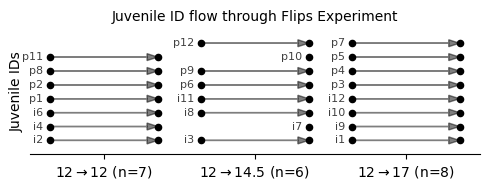

In [6]:

def plotIdFlowRun (run_ids, run_unq_ids, xloc, text_shift=-.015):
    
    for i, unq_id in enumerate(run_unq_ids):
        ## check which weeks it is in
        xpos = []
        ypos = []
        j = 0
        for key, val in run_ids.items():
            week = key.split(',')[0]
            if unq_id in val:
                ypos.append(i)
                if 'Week 1' in week:
                    xpos.append(xloc-0)
                if 'Week 2' in week:
                    xpos.append(xloc+.25)
                
                j += .25
        ## plot the lines
        
        if len(xpos) == 2:
            ## plot as arrow
            ax.arrow(xpos[0], ypos[0], 
                     xpos[1]-xpos[0]-.025, ypos[1]-ypos[0], 
                     head_width=.5, head_length=.025, fc='black', ec='black', alpha=.5)
        
        for x,y in zip(xpos,ypos):
            ax.scatter(x,y, color='black', alpha=1, s=20)
        ax.text(xpos[0]+text_shift, ypos[0], unq_id, fontsize=8, 
                rotation=0, color='black', alpha=.75, ha='right', va='center')
        

fig, ax = plt.subplots(1,1,figsize=(5,2))

plotIdFlowRun(run2_ids, run2_unq_ids, 0)
plotIdFlowRun(run1_ids, run1_unq_ids, .35)
plotIdFlowRun(run3_ids, run3_unq_ids, .7)

xticks = [0.125, .35+0.125, .7+0.125]
xticklabels = [r'$12 \to 12$ (n=7)', r'$12 \to 14.5$ (n=6)', r'$12 \to 17$ (n=8)']
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

ax.set_yticks([])
ax.set_ylim(-1, len(run1_unq_ids))

ax.set_ylabel('Juvenile IDs')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title('Juvenile ID flow through Flips Experiment',loc='center', fontsize=10)

path_fig = path_plot_dir / 'flips_id_flow.png'
plt.savefig(path_fig, dpi=300)

fig.tight_layout()

plt.show()
plt.close()